In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(x_full_train, y_full_train), (x_test, y_test) = mnist.load_data()

train_size = 50000

x_train, y_train = x_full_train[:train_size], y_full_train[:train_size]
x_val, y_val = x_full_train[train_size:], y_full_train[train_size:]

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=6, validation_data=(x_val, y_val), verbose=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.8724 - loss: 0.4615 - val_accuracy: 0.9726 - val_loss: 0.1100
Epoch 2/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9711 - loss: 0.1008 - val_accuracy: 0.9761 - val_loss: 0.0820
Epoch 3/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9801 - loss: 0.0669 - val_accuracy: 0.9772 - val_loss: 0.0782
Epoch 4/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9831 - loss: 0.0555 - val_accuracy: 0.9824 - val_loss: 0.0645
Epoch 5/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9863 - loss: 0.0458 - val_accuracy: 0.9831 - val_loss: 0.0641
Epoch 6/6
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9888 - loss: 0.0368 - val_accuracy: 0.9820 - val_loss: 0.0636


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

In [4]:
import pickle

with open('pickle_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print('Model saved as pickle_model.pkl')

Model saved as pickle_model.pkl


In [7]:
from google.colab import files

files.download('pickle_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
with open('pickle_model.pkl', 'rb') as file:
    pickled_model = pickle.load(file)

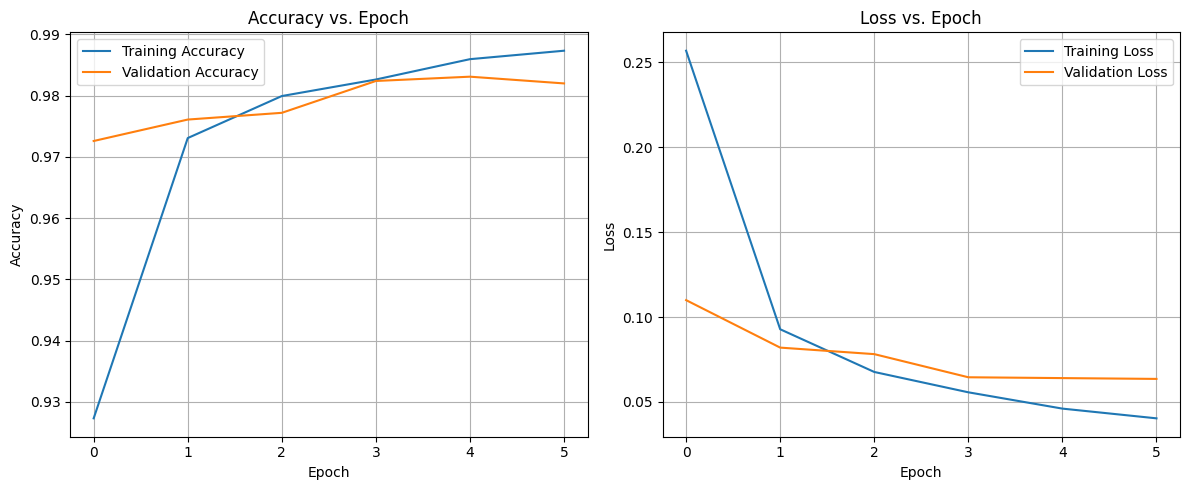

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()